# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [64]:
#Import Necessary Libraries
import pandas as pd
from IPython.display import Image, display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import joblib
from tensorflow.keras.models import load_model


# The Dataset
> ***Brief Description:***
State the Problem and A short Description of the data

***🧠 Problem Statement***:

Cardiovascular diseases, particularly heart disease, are one of the leading causes of death globally. Early detection and diagnosis can significantly reduce the risks and enhance patient outcomes. The goal of this project is to build a predictive machine learning model that can accurately classify whether a patient is likely to have heart disease based on various medical attributes.
This model can assist healthcare professionals in making faster and more informed decisions.

***📄 Dataset Description***

The dataset used in this project is a structured collection of patient health records, primarily aimed at detecting the presence of heart disease. Each row represents a patient, and each column corresponds to a medical measurement or condition.


In [31]:
#TO DO: Load Data (Seprate into: Train, Validation and test sets)
url = "https://gist.githubusercontent.com/trantuyen082001/1fc2f5c0ad1507f40e721e6d18b34138/raw/heart.csv"
df = pd.read_csv(url)

# Brief description of the data
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData description:")
print(df.describe())
print("\nClass distribution:")
print(df['output'].value_counts())



Dataset shape: (303, 14)

First 5 rows:
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  

Data description:
              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29

### 🧬 Model Architecture





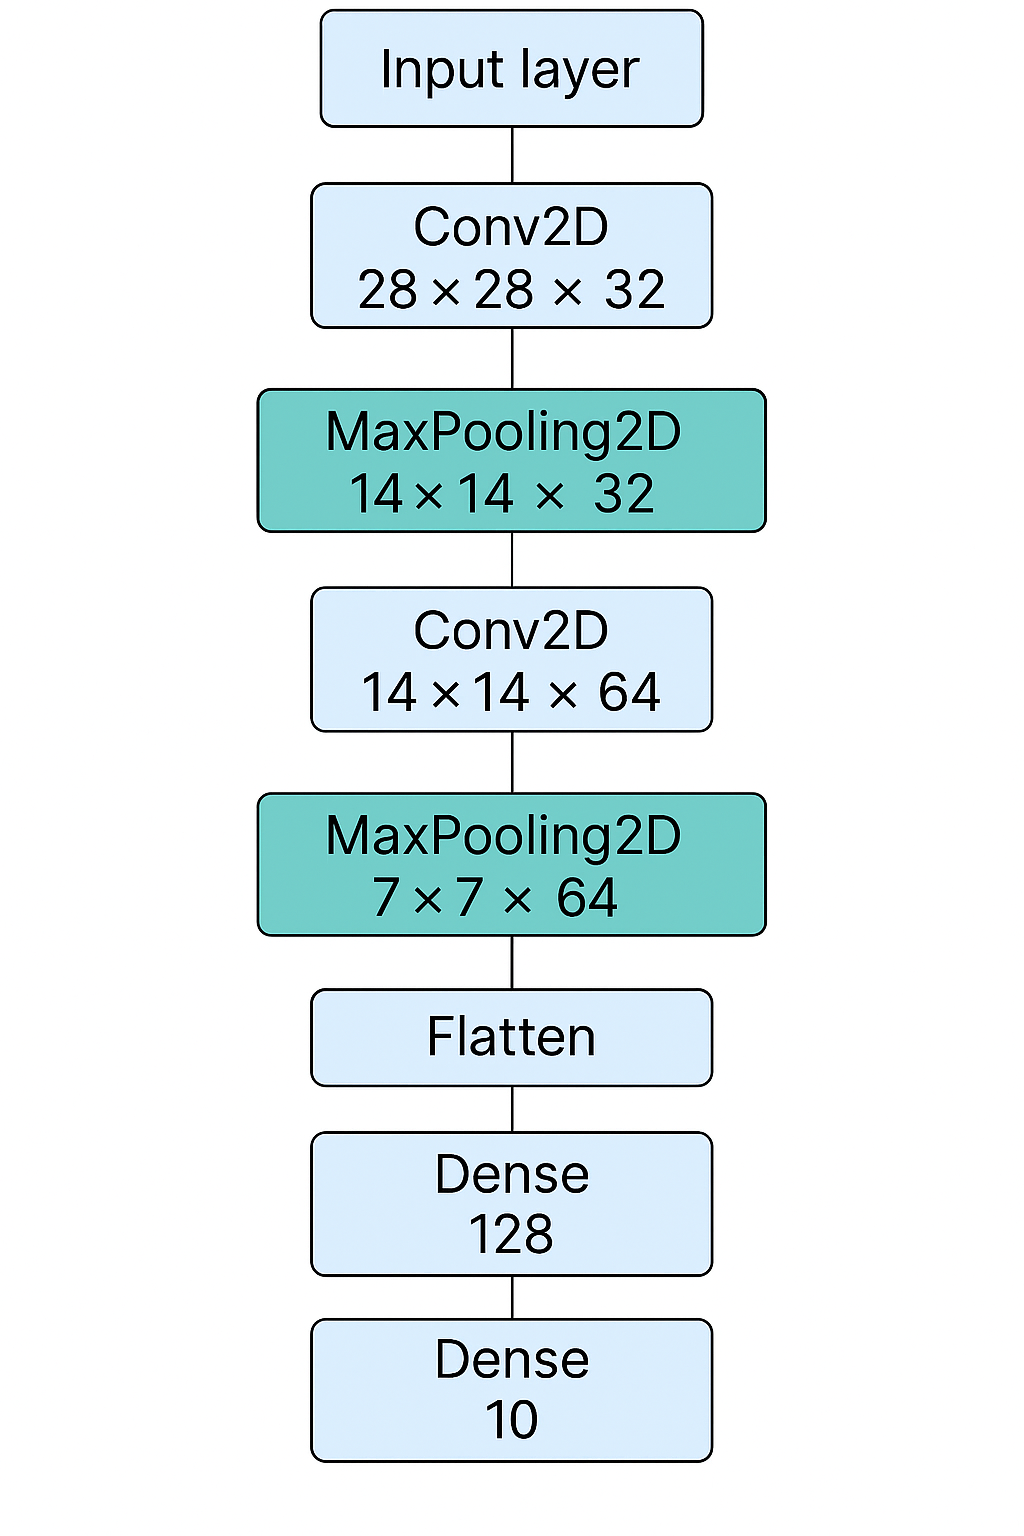

In [9]:
display(Image(filename='model_architecture.png'))

In [32]:
# Data preprocessing
X = df.drop('output', axis=1)
y = df['output']

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print("\nTrain shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)


Train shape: (212, 13)
Validation shape: (45, 13)
Test shape: (46, 13)


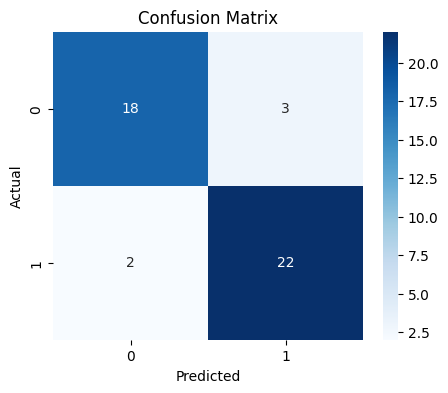

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        21
           1       0.88      0.92      0.90        24

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45



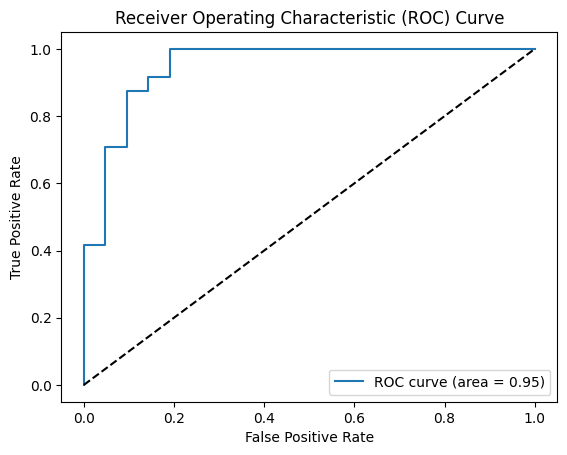

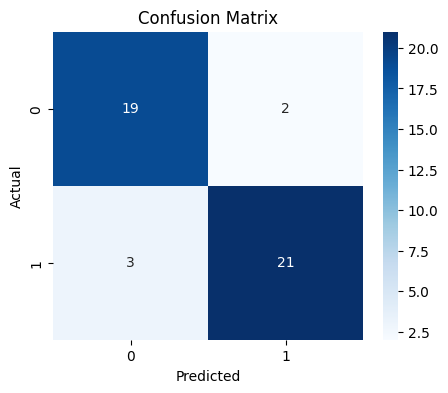

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.91      0.88      0.89        24

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45



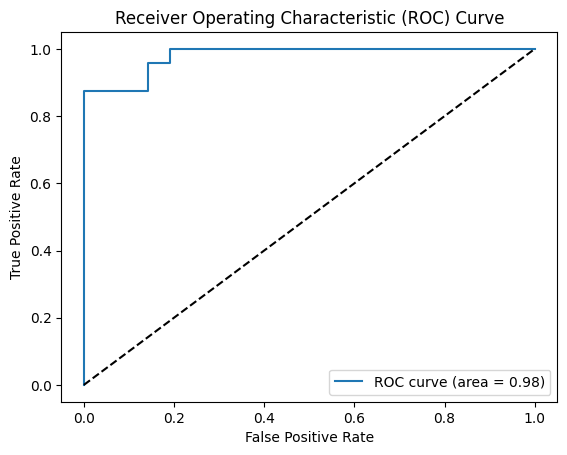

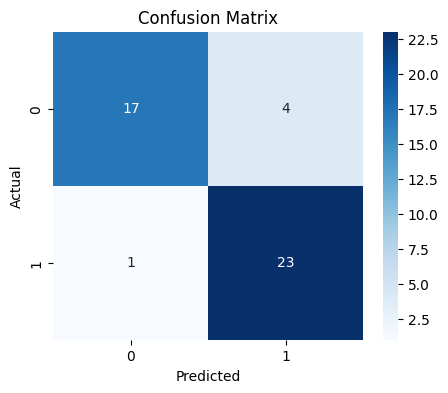

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87        21
           1       0.85      0.96      0.90        24

    accuracy                           0.89        45
   macro avg       0.90      0.88      0.89        45
weighted avg       0.90      0.89      0.89        45



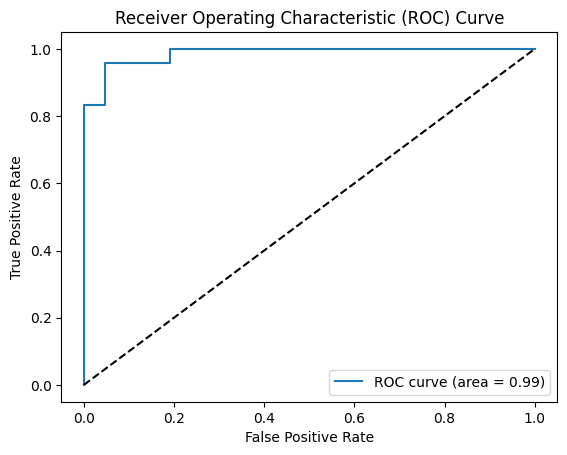

Logistic Regression Metrics: {'accuracy': 0.8888888888888888, 'precision': 0.88, 'recall': 0.9166666666666666, 'f1': 0.8979591836734694, 'roc_auc': np.float64(0.9484126984126984)}
SVM Metrics: {'accuracy': 0.8888888888888888, 'precision': 0.9130434782608695, 'recall': 0.875, 'f1': 0.8936170212765957, 'roc_auc': np.float64(0.9801587301587302)}
Random Forest Metrics: {'accuracy': 0.8888888888888888, 'precision': 0.8518518518518519, 'recall': 0.9583333333333334, 'f1': 0.9019607843137255, 'roc_auc': np.float64(0.9861111111111112)}


['random_forest_model.pkl']

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_val)

    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_val, y_pred))

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_val, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_score(y_val, y_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    metrics = {
        'accuracy': accuracy_score(y_val, y_pred),
        'precision': precision_score(y_val, y_pred),
        'recall': recall_score(y_val, y_pred),
        'f1': f1_score(y_val, y_pred),
        'roc_auc': roc_auc_score(y_val, y_proba)
    }

    return metrics

# Logistic Regression with tuned hyperparameters
lr = LogisticRegression(C=0.1, penalty='l2', solver='liblinear', random_state=42)
lr_metrics = evaluate_model(lr, X_train, y_train, X_val, y_val)

# SVM with tuned hyperparameters
svm = SVC(C=1.0, kernel='rbf', gamma='scale', probability=True, random_state=42)
svm_metrics = evaluate_model(svm, X_train, y_train, X_val, y_val)

# Random Forest with tuned hyperparameters
rf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=5, random_state=42)
rf_metrics = evaluate_model(rf, X_train, y_train, X_val, y_val)

# Display results
print("Logistic Regression Metrics:", lr_metrics)
print("SVM Metrics:", svm_metrics)
print("Random Forest Metrics:", rf_metrics)
joblib.dump(lr, 'logistic_regression_model.pkl')
joblib.dump(svm, 'svm_model.pkl')
joblib.dump(rf, 'random_forest_model.pkl')

#Task: Define a function that creates models without and With specified Optimization techniques


In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

def create_nn_model(optimizer='adam', learning_rate=0.001,
                   regularization=None, reg_strength=0.01,
                   dropout_rate=0.0, early_stopping=True):
    model = Sequential()

    # Input layer
    if regularization == 'l1':
        reg = l1(reg_strength)
    elif regularization == 'l2':
        reg = l2(reg_strength)
    else:
        reg = None

    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],),
                  kernel_regularizer=reg))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    # Hidden layers
    model.add(Dense(32, activation='relu', kernel_regularizer=reg))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    else:
        opt = Adam(learning_rate=learning_rate)

    model.compile(optimizer=opt,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Early stopping
    callbacks = []
    if early_stopping:
        callbacks.append(EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True))

    return model, callbacks



# Task: Print out the Final Model Accuracy and plot the Loss curve

In [50]:
def train_and_evaluate_nn(model_params, epochs=50, batch_size=32):
    model, callbacks = create_nn_model(model_params)

    history = model.fit(X_train, y_train,
                       validation_data=(X_val, y_val),
                       epochs=epochs,
                       batch_size=batch_size,
                       callbacks=callbacks,
                       verbose=0)

    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    # Evaluate on validation set
    y_pred = (model.predict(X_val) > 0.5).astype(int)
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    y_proba = model.predict(X_val)

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_val, y_pred))

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_val, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_score(y_val, y_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    metrics = {
        'accuracy': accuracy_score(y_val, y_pred),
        'precision': precision_score(y_val, y_pred),
        'recall': recall_score(y_val, y_pred),
        'f1': f1_score(y_val, y_pred),
        'roc_auc': roc_auc_score(y_val, y_proba),
        'loss': history.history['val_loss'][-1]
    }

    return model, metrics

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


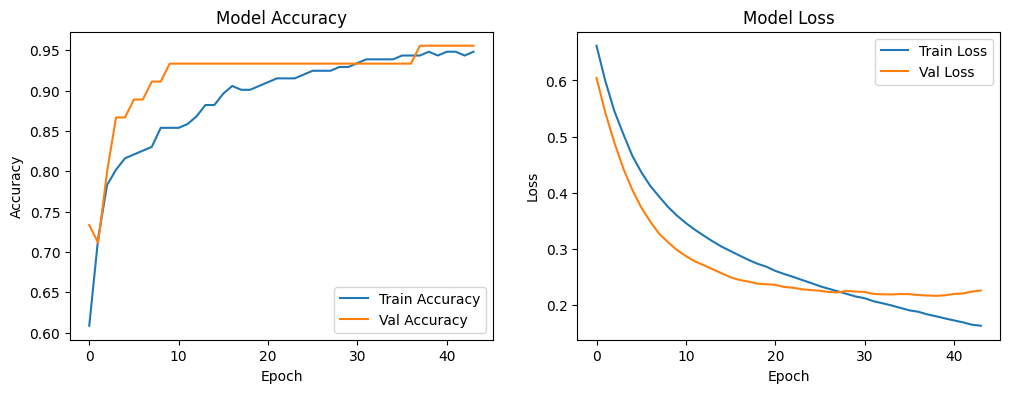

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


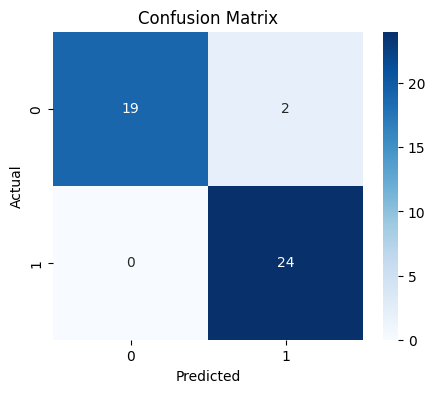

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.92      1.00      0.96        24

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



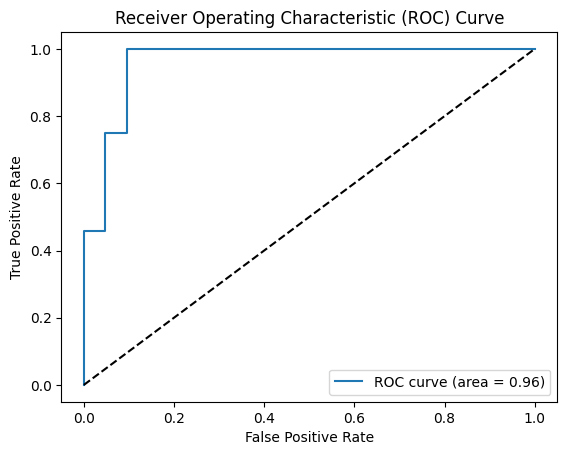

Instance 1 Metrics: {'accuracy': 0.9555555555555556, 'precision': 0.9230769230769231, 'recall': 1.0, 'f1': 0.96, 'roc_auc': np.float64(0.9623015873015873), 'loss': 0.2257848083972931}


In [59]:
instance1_params = {
    'optimizer': 'adam',
    'learning_rate': 0.001,
    'regularization': None,
    'reg_strength': 0.0,
    'dropout_rate': 0.0,
    'early_stopping': False
}
model1, metrics1 = train_and_evaluate_nn(instance1_params, epochs=100)
print("Instance 1 Metrics:", metrics1)
model1.save('nn_instance1_adam_no_reg.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


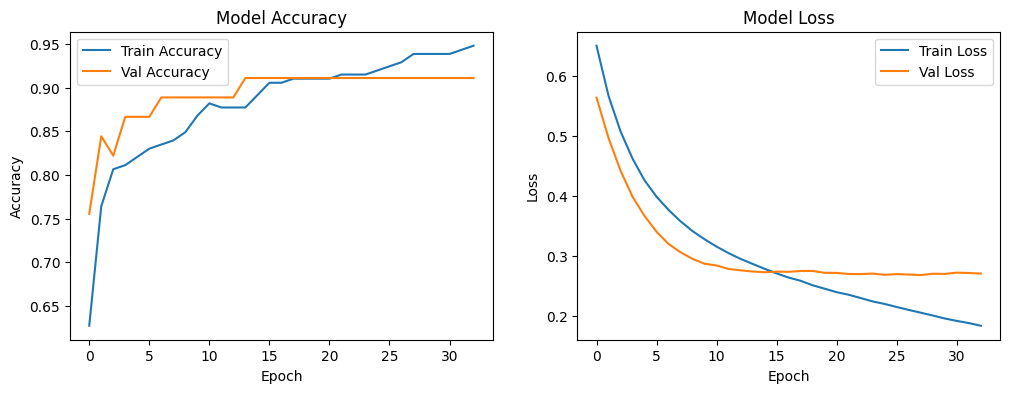

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


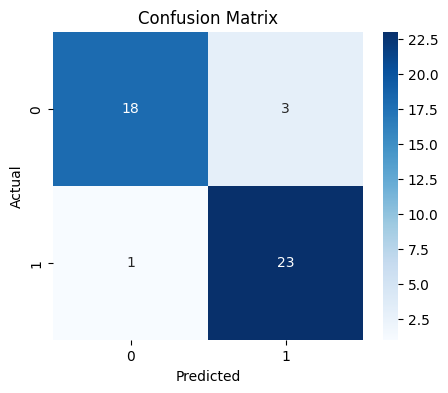

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.88      0.96      0.92        24

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



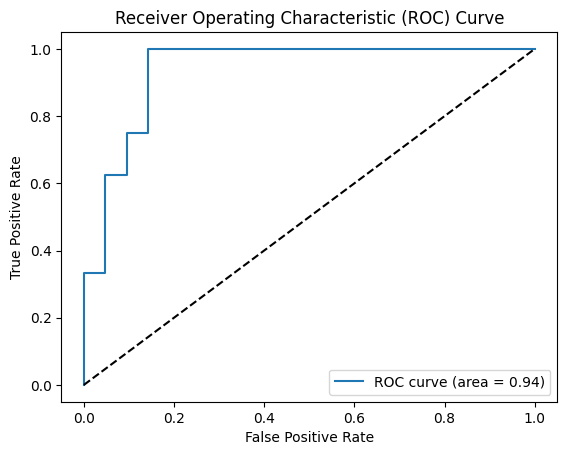

Instance 2 Metrics: {'accuracy': 0.9111111111111111, 'precision': 0.8846153846153846, 'recall': 0.9583333333333334, 'f1': 0.92, 'roc_auc': np.float64(0.9384920634920635), 'loss': 0.27054086327552795}


In [60]:
instance2_params = {
    'optimizer': 'adam',
    'learning_rate': 0.001,
    'regularization': 'l2',
    'reg_strength': 0.01,
    'dropout_rate': 0.0,
    'early_stopping': True
}
model2, metrics2 = train_and_evaluate_nn(instance2_params)
print("Instance 2 Metrics:", metrics2)
model2.save('nn_instance2.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


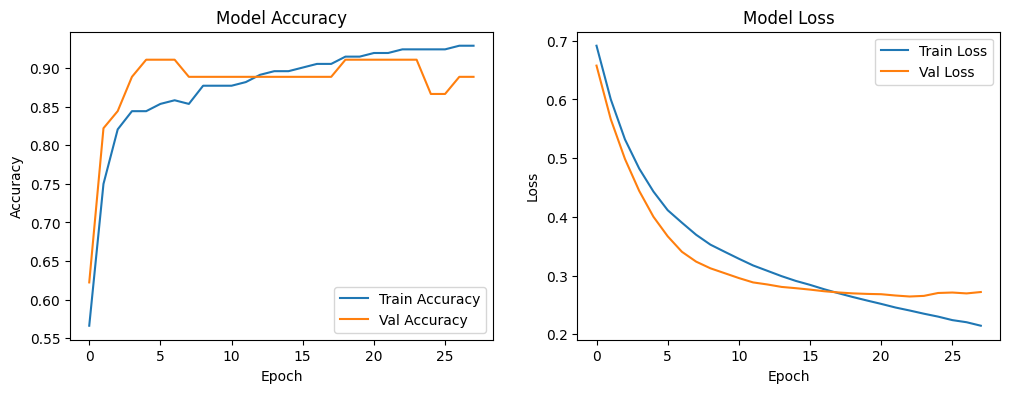

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


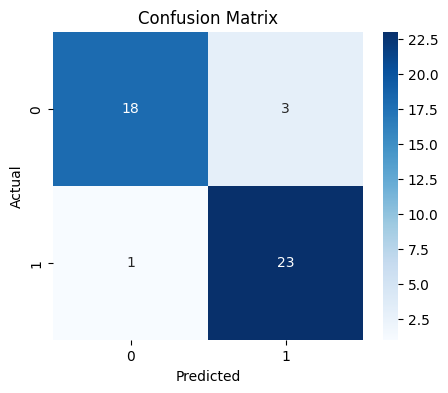

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.88      0.96      0.92        24

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



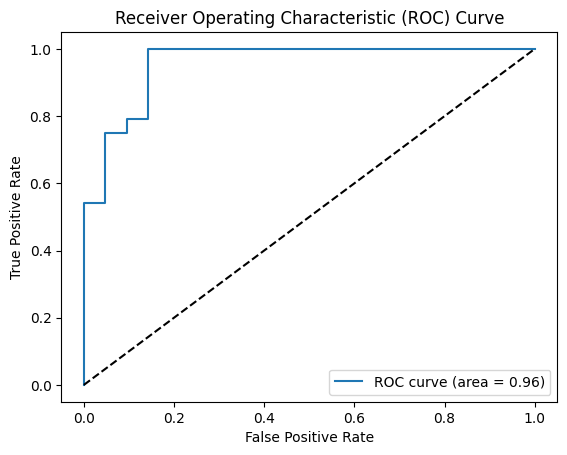

Instance 3 Metrics: {'accuracy': 0.9111111111111111, 'precision': 0.8846153846153846, 'recall': 0.9583333333333334, 'f1': 0.92, 'roc_auc': np.float64(0.9563492063492064), 'loss': 0.2720537483692169}


In [61]:
# Instance 3: With RMSprop optimizer, dropout, and early stopping
instance3_params = {
    'optimizer': 'rmsprop',
    'learning_rate': 0.0005,
    'regularization': None,
    'reg_strength': 0.0,
    'dropout_rate': 0.3,
    'early_stopping': True
}
model3, metrics3 = train_and_evaluate_nn(instance3_params)
print("Instance 3 Metrics:", metrics3)
model3.save('nn_instance3.h5')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


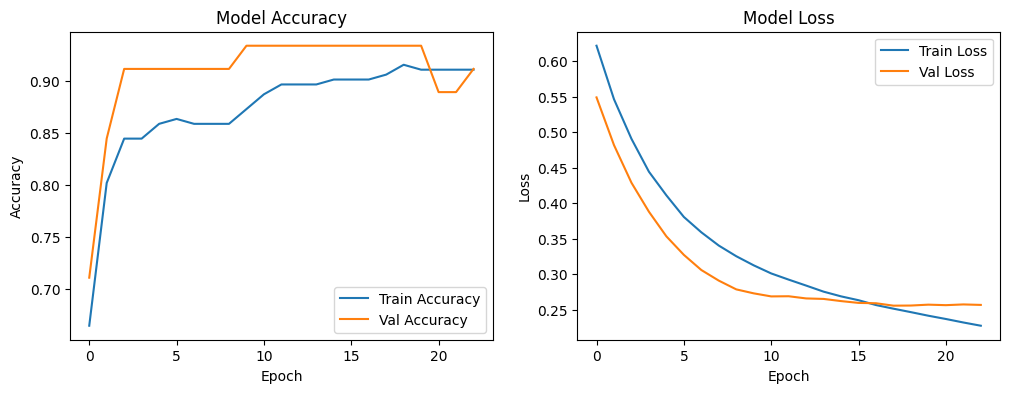

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


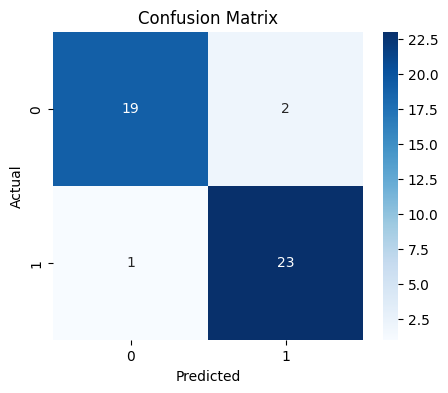

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.92      0.96      0.94        24

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



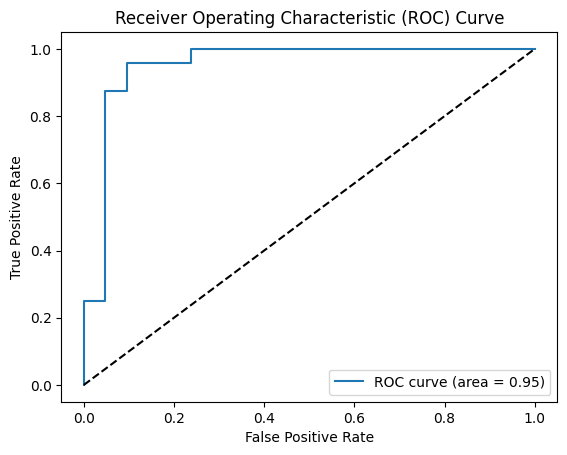

Instance 4 Metrics: {'accuracy': 0.9333333333333333, 'precision': 0.92, 'recall': 0.9583333333333334, 'f1': 0.9387755102040817, 'roc_auc': np.float64(0.9523809523809523), 'loss': 0.2568144202232361}


In [62]:
instance4_params = {
    'optimizer': 'adam',
    'learning_rate': 0.0001,
    'regularization': 'l1',
    'reg_strength': 0.005,
    'dropout_rate': 0.2,
    'early_stopping': True
}
model4, metrics4 = train_and_evaluate_nn(instance4_params)
print("Instance 4 Metrics:", metrics4)
model4.save('nn_instance4.h5')

In [63]:
results = {
    'Instance 1': {
        'Optimizer': 'Adam (default)',
        'Regularizer': 'None',
        'Epochs': 100,
        'Early Stopping': 'No',
        'Number of Layers': 3,
        'Learning Rate': 0.001,
        'Dropout': 0.0,
        **metrics1
    },
    'Instance 2': {
        'Optimizer': 'Adam',
        'Regularizer': 'L2',
        'Epochs': 50,
        'Early Stopping': 'Yes',
        'Number of Layers': 3,
        'Learning Rate': 0.001,
        'Dropout': 0.0,
        **metrics2
    },
    'Instance 3': {
        'Optimizer': 'RMSprop',
        'Regularizer': 'None',
        'Epochs': 50,
        'Early Stopping': 'Yes',
        'Number of Layers': 3,
        'Learning Rate': 0.0005,
        'Dropout': 0.3,
        **metrics3
    },
    'Instance 4': {
        'Optimizer': 'Adam',
        'Regularizer': 'L1',
        'Epochs': 50,
        'Early Stopping': 'Yes',
        'Number of Layers': 3,
        'Learning Rate': 0.0001,
        'Dropout': 0.2,
        **metrics4
    }
}

results_df = pd.DataFrame.from_dict(results, orient='index')
print("\nComparison Table:")
print(results_df[['Optimizer', 'Regularizer', 'Epochs', 'Early Stopping',
                 'Learning Rate', 'Dropout', 'accuracy', 'f1', 'precision',
                 'recall', 'roc_auc', 'loss']])


Comparison Table:
                 Optimizer Regularizer  Epochs Early Stopping  Learning Rate  \
Instance 1  Adam (default)        None     100             No         0.0010   
Instance 2            Adam          L2      50            Yes         0.0010   
Instance 3         RMSprop        None      50            Yes         0.0005   
Instance 4            Adam          L1      50            Yes         0.0001   

            Dropout  accuracy        f1  precision    recall   roc_auc  \
Instance 1      0.0  0.955556  0.960000   0.923077  1.000000  0.962302   
Instance 2      0.0  0.911111  0.920000   0.884615  0.958333  0.938492   
Instance 3      0.3  0.911111  0.920000   0.884615  0.958333  0.956349   
Instance 4      0.2  0.933333  0.938776   0.920000  0.958333  0.952381   

                loss  
Instance 1  0.225785  
Instance 2  0.270541  
Instance 3  0.272054  
Instance 4  0.256814  


#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [67]:
def make_predictions(model_path, X):
    model = load_model(model_path)
    y_pred_proba = model.predict(X)
    y_pred = (y_pred_proba > 0.5).astype(int)
    return y_pred, y_pred_proba


In [69]:
model_path = 'nn_instance2.h5'
y_pred, y_pred_proba = make_predictions(model_path, X_test)
print("Predictions:", y_pred.flatten())

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predictions: [0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0
 1 0 0 1 0 1 1 1 0]


Congratulations!!
